## 코랩 런타임 끊김 방지

In [ ]:
%%html
<audio src="https://henk.tech/colabkobold/silence.m4a" controls>

## 구글 드라이브에 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/aiffel/AIFFELTHON

DATA = 'the-circor-digiscope-phonocardiogram-dataset-1.0.3/'
HOME_DIR = '/content/drive/MyDrive/aiffel/AIFFELTHON/'
PATH = HOME_DIR + DATA + 'training_data'
SAMPLE_RATE = 4000
HOP_LENGTH = 40

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/aiffel/AIFFELTHON


## 데이터 분석

### 환자 ID를 train, test 데이터로 나눔

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# txt파일 불러오기
file_list = os.listdir(PATH)
txt_list = [os.path.join(PATH, file) for file in file_list if file.endswith(".txt")]

# 환자 아이디를 훈련 데이터셋과 테스트 데이터셋으로 나눔
train_patient_txt, test_patient_txt = train_test_split(txt_list, test_size=0.3, random_state=42)

# 결과 출력
print("Train Patient IDs:", train_patient_txt)
print("Test Patient IDs:", test_patient_txt)

Train Patient IDs: ['/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/84776.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/68702.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50012.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/84778.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/84733.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50248.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/85305.txt', '/content/drive/MyDrive/aiffel/AIFFELTHON/the-circor-digiscope-phonocardiogram-dataset-1.0.3/training_data/50325.txt', '/content/drive/MyDrive/aiff

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_list = os.listdir(PATH)
patient_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".txt")]

#------------------확인용-------------
wav_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".wav")]
label_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".tsv")]
head_list = [os.path.join(PATH,file) for file in file_list if file.endswith(".hea")]

In [ ]:
heas = []
wavs = []
tsvs = []

In [ ]:
# for path_txt in patient_list:
for path_txt in txt_list:
    #print("{0}.hea".format(path_txt[:-4]))
    with open("{0}.txt".format(path_txt[:-4]), "r") as f:
        P_id, n, sr = f.readline().split()
        for _ in range(int(n)):
            #print(f.readline())
            _, hea, wav, tsv = f.readline().split()
            heas.append(hea)
            wavs.append(wav)
            tsvs.append(tsv)

In [ ]:
# 음성 길이 확인
hea_list=[]
for hea in heas:
    path_hea = os.path.join(PATH,hea)
    with open(path_hea, "r") as f:
        id, _, sr, length = f.readline().split()
        hea_list.append(int(length)/float(sr))

평균 :  22.87030121719886
최대값 :  64.512
최소값 :  5.152
----
25
2545


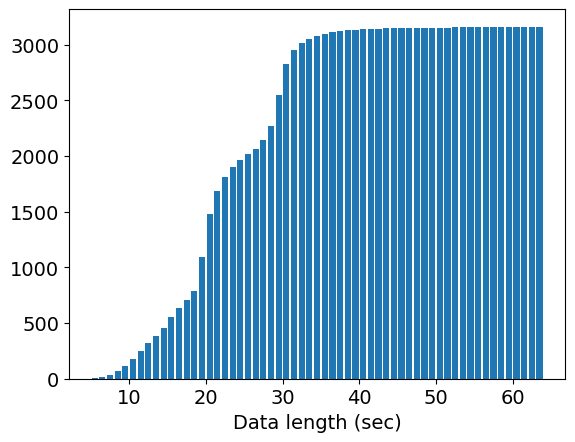

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hea_list = np.array(hea_list) ## 데이터
bins = np.arange(5,65,1)

print("평균 : ", np.average(hea_list))
print("최대값 : ", np.max(hea_list))
print("최소값 : ", np.min(hea_list))

cut = pd.cut(hea_list, bins=bins) ## 데이터를 일정 구간으로 n등분한다.
#print(cut.describe())

plt.hist(hea_list, bins, rwidth = 0.8, cumulative=True)
plt.xlabel('Data length (sec)', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
print("----")
hist, _ =np.histogram(hea_list, bins=bins)
end_index = np.searchsorted(bins, 29, side='right')
print(end_index)

count = np.sum(hist[0:25])
print(count)#5~28초 사이의 데이터 개수

In [ ]:
s1_ranges = []
s2_ranges = []
for tsv in tsvs:
    path_tsv = os.path.join(PATH,tsv)
    with open(path_tsv, "r") as f:
        while 1:
            line = f.readline()
            if not line: break
            start, end, s_type = line.split()
            if s_type == "1":
                s1_ranges.append(float(end)-float(start))

            elif  s_type == "3":
                s2_ranges.append(float(end)-float(start))

In [ ]:
s1_ranges = np.array(s1_ranges) ## 데이터
s2_ranges = np.array(s2_ranges)

bins = np.arange(5,65,1)

print("s1 길이 최소값 : ", np.min(s1_ranges))
print("s1 길이 최대값 : ", np.max(s1_ranges))
print("s1 길이 평균 : ", np.average(s1_ranges))
print("---------------------")
print("s2 길이 최소값 : ", np.min(s2_ranges))
print("s2 길이 최대값 : ", np.max(s2_ranges))
print("s2 길이 평균 : ", np.average(s2_ranges))

s1 길이 최소값 :  0.008209000000000799
s1 길이 최대값 :  0.7291699999999999
s1 길이 평균 :  0.119164496582365
---------------------
s2 길이 최소값 :  0.0008700000000008146
s2 길이 최대값 :  0.6797499999999985
s2 길이 평균 :  0.10533918449571068


## 데이터 변환
## wav => (전체 파일 개수, 주파수, 시간)
## tsv => (class, x1, x2)

In [3]:
import math

class Biquad:

  # pretend enumeration
  LOWPASS, HIGHPASS, BANDPASS, NOTCH, PEAK, LOWSHELF, HIGHSHELF = range(7)

  def __init__(self,typ, freq, srate, Q, dbGain = 0):
      types = {
	  Biquad.LOWPASS : self.lowpass,
	  Biquad.HIGHPASS : self.highpass,
	  Biquad.BANDPASS : self.bandpass,
	  Biquad.NOTCH : self.notch,
	  Biquad.PEAK : self.peak,
	  Biquad.LOWSHELF : self.lowshelf,
	  Biquad.HIGHSHELF : self.highshelf
      }
      assert typ in types
      freq = float(freq)
      self.srate = float(srate)
      Q = float(Q)
      dbGain = float(dbGain)
      self.a0 = self.a1 = self.a2 = 0
      self.b0 = self.b1 = self.b2 = 0
      self.x1 = self.x2 = 0
      self.y1 = self.y2 = 0
      # only used for peaking and shelving filter types
      A = math.pow(10, dbGain / 40)
      omega = 2 * math.pi * freq / self.srate
      sn = math.sin(omega)
      cs = math.cos(omega)
      alpha = sn / (2*Q)
      beta = math.sqrt(A + A)
      types[typ](A,omega,sn,cs,alpha,beta)
      # prescale constants
      self.b0 /= self.a0
      self.b1 /= self.a0
      self.b2 /= self.a0
      self.a1 /= self.a0
      self.a2 /= self.a0

  def lowpass(self,A,omega,sn,cs,alpha,beta):
    self.b0 = (1 - cs) /2
    self.b1 = 1 - cs
    self.b2 = (1 - cs) /2
    self.a0 = 1 + alpha
    self.a1 = -2 * cs
    self.a2 = 1 - alpha

  def highpass(self,A,omega,sn,cs,alpha,beta):
    self.b0 = (1 + cs) /2
    self.b1 = -(1 + cs)
    self.b2 = (1 + cs) /2
    self.a0 = 1 + alpha
    self.a1 = -2 * cs
    self.a2 = 1 - alpha

  def bandpass(self,A,omega,sn,cs,alpha,beta):
    self.b0 = alpha
    self.b1 = 0
    self.b2 = -alpha
    self.a0 = 1 + alpha
    self.a1 = -2 * cs
    self.a2 = 1 - alpha

  def notch(self,A,omega,sn,cs,alpha,beta):
    self.b0 = 1
    self.b1 = -2 * cs
    self.b2 = 1
    self.a0 = 1 + alpha
    self.a1 = -2 * cs
    self.a2 = 1 - alpha

  def peak(self,A,omega,sn,cs,alpha,beta):
    self.b0 = 1 + (alpha * A)
    self.b1 = -2 * cs
    self.b2 = 1 - (alpha * A)
    self.a0 = 1 + (alpha /A)
    self.a1 = -2 * cs
    self.a2 = 1 - (alpha /A)

  def lowshelf(self,A,omega,sn,cs,alpha,beta):
    self.b0 = A * ((A + 1) - (A - 1) * cs + beta * sn)
    self.b1 = 2 * A * ((A - 1) - (A + 1) * cs)
    self.b2 = A * ((A + 1) - (A - 1) * cs - beta * sn)
    self.a0 = (A + 1) + (A - 1) * cs + beta * sn
    self.a1 = -2 * ((A - 1) + (A + 1) * cs)
    self.a2 = (A + 1) + (A - 1) * cs - beta * sn

  def highshelf(self,A,omega,sn,cs,alpha,beta):
    self.b0 = A * ((A + 1) + (A - 1) * cs + beta * sn)
    self.b1 = -2 * A * ((A - 1) + (A + 1) * cs)
    self.b2 = A * ((A + 1) + (A - 1) * cs - beta * sn)
    self.a0 = (A + 1) - (A - 1) * cs + beta * sn
    self.a1 = 2 * ((A - 1) - (A + 1) * cs)
    self.a2 = (A + 1) - (A - 1) * cs - beta * sn

  # perform filtering function
  def __call__(self,x):
    y = self.b0 * x + self.b1 * self.x1 + self.b2 * self.x2 - self.a1 * self.y1 - self.a2 * self.y2
    self.x2, self.x1 = self.x1, x
    self.y2, self.y1 = self.y1, y
    return y

  # provide a static result for a given frequency f
  def result(self,f):
    phi = (math.sin(math.pi * f * 2/(2.0 * self.srate)))**2
    return ((self.b0+self.b1+self.b2)**2 - \
    4*(self.b0*self.b1 + 4*self.b0*self.b2 + \
    self.b1*self.b2)*phi + 16*self.b0*self.b2*phi*phi) / \
    ((1+self.a1+self.a2)**2 - 4*(self.a1 + \
    4*self.a2 + self.a1*self.a2)*phi + 16*self.a2*phi*phi)

  def log_result(self,f):
    try:
      r = 10 * math.log10(self.result(f))
    except:
      r = -200
    return r

  # return computed constants
  def constants(self):
    return self.b0,self.b1,self.b2,self.a1,self.a2

In [4]:
import os
import numpy as np
import librosa
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from torchvision import transforms
import torchaudio
import torchaudio.transforms as ta_transforms

class CustomDataset(Dataset):
    def __init__(self, path, txt_list,
                 target_size=(40, 2500),
                 th=25,
                 resizing=False,
                 filtering=False,
                 filter_hz=500):
        self.path = path
        self.txt_list = txt_list
        self.target_size = target_size
        self.th = int(th * SAMPLE_RATE / HOP_LENGTH)
        self.resizing = resizing
        self.filtering = filtering
        self.filter_hz = filter_hz

        self.get_file_list()
        self.x = self.get_mel_spectrogram()
        self.y = self.get_label()

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def get_file_list(self):
        self.heas = []
        self.wavs = []
        self.tsvs = []

        for path_txt in self.txt_list:
            with open(path_txt, "r") as f:
                P_id, n, sr = f.readline().split()
                for _ in range(int(n)):
                    _, hea, wav, tsv = f.readline().split()
                    self.heas.append(hea)
                    self.wavs.append(wav)
                    self.tsvs.append(tsv)
        self.heas.sort()
        self.wavs.sort()
        self.tsvs.sort()

    # torchaudio로 필터링 적용
    def apply_filter_torchaudio(self, audio, cutoff_hz):
        biquad = Biquad(typ=Biquad.LOWPASS, freq=cutoff_hz, srate=SAMPLE_RATE, Q=0.707)
        b0, b1, b2, a1, a2 = biquad.constants()
        b0 = torch.tensor(b0)
        b1 = torch.tensor(b1)
        b2 = torch.tensor(b2)
        a0 = 1
        a1 = torch.tensor(a1)
        a2 = torch.tensor(a2)
        filtered_audio = torchaudio.functional.biquad(audio, b0, b1, b2, a0, a1, a2)
        return filtered_audio

    def padding(self, spec, target_length, padding_value=0):
        pad_width = target_length - spec.shape[-1]
        padded_spec = torch.nn.functional.pad(spec, (0, pad_width, 0, 0), "constant", 0)
        return padded_spec

    def resize_spectrogram(self, spec, new_shape):
        resized_spec = transforms.functional.resize(img=spec, size=new_shape, antialias=None)
        return resized_spec

    def get_mel_spectrogram(self):
        audio_list = []
        self.scale_list = []
        self.iter_list = []

        for path_wav in self.wavs:
            path = os.path.join(PATH, path_wav)

            # Torchaudio 이용하여 파일 로드
            x = torchaudio.load(path)[0]
            # Filtering
            if self.filtering is True:
                cutoff_frequency = self.filter_hz
                x = self.apply_filter_torchaudio(x, cutoff_frequency)
            ms = ta_transforms.MelSpectrogram(sample_rate=SAMPLE_RATE,
                                        n_fft=128,
                                        win_length=100,
                                        n_mels=40,
                                        hop_length=HOP_LENGTH)(x)
            # 원본 wav의 길이가 th보다 길다면 Slicing
            if ms.shape[-1] > self.th:
                scale = 1
                num_splits = ms.shape[-1] // self.th    # wav길이 = th의 배수
                if ms.shape[-1] % self.th != 0: # wav길이 != th의 배수
                    num_splits += 1
                self.iter_list.append(num_splits)

                for i in range(num_splits):
                    start_idx = i * self.th
                    end_idx = (i + 1) * self.th
                    split = ms[..., start_idx:end_idx]

                    # th보다 길이가 짧다면
                    if split.shape[-1] < self.th:
                        # Resizing
                        if self.resizing is True:
                            if split.shape[-1] == 0:
                                print(path_wav, ms.shape[-1], num_splits)
                            scale = self.th / split.shape[-1]
                            target_shape = (split.shape[-2], self.th)
                            split = self.resize_spectrogram(split, target_shape)
                        # Padding
                        else:
                            split = self.padding(split, self.th)
                    # 최종 Resizing
                    resized = self.resize_spectrogram(split, self.target_size)
                    audio_list.append(resized)
                    if self.resizing is True:
                        self.scale_list.append(scale)

            # 원본 wav의 길이가 th보다 짧거나 같다면
            else:
                self.iter_list.append(1)
                scale = 1
                # th보다 짧다면
                if ms.shape[-1] < self.th:
                    # Resizing
                    if self.resizing is True:
                        scale = self.th / ms.shape[-1]
                        target_shape = (ms.shape[-2], self.th)
                        ms = self.resize_spectrogram(ms, target_shape)
                    # Padding
                    else:
                        ms = self.padding(ms, self.th)
                # 최종 resizing
                ms = self.resize_spectrogram(ms, self.target_size)
                audio_list.append(ms)
                if self.resizing is True:
                    self.scale_list.append(scale)
        return torch.stack(audio_list)

    def get_label(self):
        labels = []
        for i, path_tsv in enumerate(self.tsvs):
            path = os.path.join(PATH, path_tsv)
            tsv_data = pd.read_csv(path, sep='\t', header=None)
            iter = self.iter_list[i]
            continuous = False
            next_end = 0
            next_class = 0
            for _iter in range(iter):
                label = []
                if self.resizing is True:
                    scale = self.scale_list[sum(self.iter_list[:i]) + _iter]
                for _, tsv_row in tsv_data.iterrows():
                    # 이전 구간에서 이어진다면 tsv_row[0] = 0
                    if continuous is True:
                        tsv_row[0] = 0
                        tsv_row[1] = next_end
                        tsv_row[2] = next_class
                        continuous = False

                    # 이전 구간에서 이어지지 않는다면 새로 데이터 가져오기
                    elif tsv_row[2] in [1, 3]:
                        # 구간 불러와서 sr값 곱하고 hop_legth로 나누기
                        tsv_row[0] = tsv_row[0] * SAMPLE_RATE / HOP_LENGTH - (_iter * self.th)
                        tsv_row[1] = tsv_row[1] * SAMPLE_RATE / HOP_LENGTH - (_iter * self.th)
                        tsv_row[2] = 0 if tsv_row[2] == 1 else 1    # S1=0, S2=1
                        # 시작점이 th 이상이라면, 이전 구간 이미지의 라벨이라면 continue
                        if tsv_row[0] >= self.th or tsv_row[0] < 0:
                            continue
                        # th보다 길이가 짧다면(나뉜 이미지의 가장 마지막 이미지라면)
                        if _iter == iter - 1:
                            # resize를 하였다면 라벨 값도 스케일링
                            if self.resizing is True:
                                tsv_row[0] *= scale
                                tsv_row[1] *= scale

                        # th보다 길이가 길다면 Slicing
                        elif tsv_row[1] >= self.th:
                            next_end = tsv_row[1] - self.th
                            next_class = tsv_row[2]
                            tsv_row[1] = self.th - 1
                            continuous = True
                            # 최종 resize한 값 으로 보간
                            tsv_row[0] *= self.target_size[1] / self.th
                            tsv_row[1] *= self.target_size[1] / self.th
                            label.append((int(tsv_row[2]), tsv_row[0], tsv_row[1]))
                            break

                    # 이전 값에서 이어지지 않으면서 S1, S2가 아닌 경우 continue
                    else: continue

                    # 최종 resize한 값 으로 보간
                    tsv_row[0] *= self.target_size[1] / self.th
                    tsv_row[1] *= self.target_size[1] / self.th
                    label.append((int(tsv_row[2]), tsv_row[0], tsv_row[1]))
                labels.append(label)
        return labels

※주의사항: colab 기준 tran_patient_txt를 th 5초, target_size (300, 300)으로 설정했을 시 RAM을 10GB가까이 사용합니다!

In [5]:
dataset = CustomDataset(PATH, train_patient_txt, target_size=(300, 300), th=5, resizing=True, filtering=True)

In [8]:
len(dataset)

11052

### 패딩, 리사이징 결과 히스토그램 시각화

In [11]:
# import matplotlib.pyplot as plt

# # 데이터셋 생성
# dataset_resizing_false = CustomDataset(PATH, txt_list, target_size=(300, 300), th=1, resizing=False, filtering=True)
# dataset_resizing_true = CustomDataset(PATH, txt_list, target_size=(300, 300), th=1, resizing=True, filtering=True)

# # 데이터와 레이블 추출
# data_resizing_false = dataset_resizing_false.x
# labels_resizing_false = dataset_resizing_false.y

# data_resizing_true = dataset_resizing_true.x
# labels_resizing_true = dataset_resizing_true.y

# # 클래스별 데이터 길이 저장
# class_lengths_resizing_false = {0: [], 1: []}
# class_lengths_resizing_true = {0: [], 1: []}

# for i in range(len(data_resizing_true)):
#     spec_false = data_resizing_false[i]
#     label_false = labels_resizing_false[i]
#     spec_true = data_resizing_true[i]
#     label_true = labels_resizing_true[i]

#     for l in label_false:
#         class_id, start, end = l
#         class_lengths_resizing_false[class_id].append(end - start)

#     for l in label_true:
#         class_id, start, end = l
#         class_lengths_resizing_true[class_id].append(end - start)

# # 히스토그램 그리기
# plt.figure(figsize=(10, 6))

# plt.hist(class_lengths_resizing_false[0], bins=20, alpha=1.0, color='green', label='S1 (Resizing=False)')
# plt.hist(class_lengths_resizing_false[1], bins=20, alpha=1.0, color='red', label='S2 (Resizing=False)')
# plt.hist(class_lengths_resizing_true[0], bins=20, alpha=0.7, color='blue', label='S1 (Resizing=True)')
# plt.hist(class_lengths_resizing_true[1], bins=20, alpha=0.7, color='yellow', label='S2 (Resizing=True)')

# plt.xlabel("Segment Length")
# plt.ylabel("Frequency")
# plt.title("Histogram of Segment Lengths")
# plt.legend()

# plt.tight_layout()
# plt.show()

# for class_id in [0, 1]:
#     print(f"S{class_id + 1} (Resizing=False):")
#     print("  Min Length:", np.min(class_lengths_resizing_false[class_id]))
#     print("  Max Length:", np.max(class_lengths_resizing_false[class_id]))
#     print("  Mean Length:", np.mean(class_lengths_resizing_false[class_id]), "\n")

#     print(f"S{class_id + 1} (Resizing=True):")
#     print("  Min Length:", np.min(class_lengths_resizing_true[class_id]))
#     print("  Max Length:", np.max(class_lengths_resizing_true[class_id]))
#     print("  Mean Length:", np.mean(class_lengths_resizing_true[class_id]), "\n")


### 데이터, 라벨 변환 결과 이미지로 시각화

In [7]:
import matplotlib.pyplot as plt

for i, d in enumerate(dataset):
    if i == 50:
        break
    x, y = d
    print(x[0].shape)

    plt.figure(figsize=(10,8))
    # 스펙트로그램 시각화
    librosa.display.specshow(
        librosa.power_to_db(np.array(x[0])), sr=SAMPLE_RATE, hop_length=HOP_LENGTH, x_axis='time', y_axis='mel', cmap='magma')

    # 레이블 시각화
    for label in y:
        class_id, start, end = label
        start /= SAMPLE_RATE / HOP_LENGTH
        end /= SAMPLE_RATE / HOP_LENGTH
        color = 'red' if class_id == 1 else 'blue'
        plt.axvspan(start, end, color=color)

    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram{i + 1} (dB)")

Output hidden; open in https://colab.research.google.com to view.

결과를 한눈에 잘 보여주는 예시인 12번과 13번 스펙트로그램을 아래 첨부합니다.

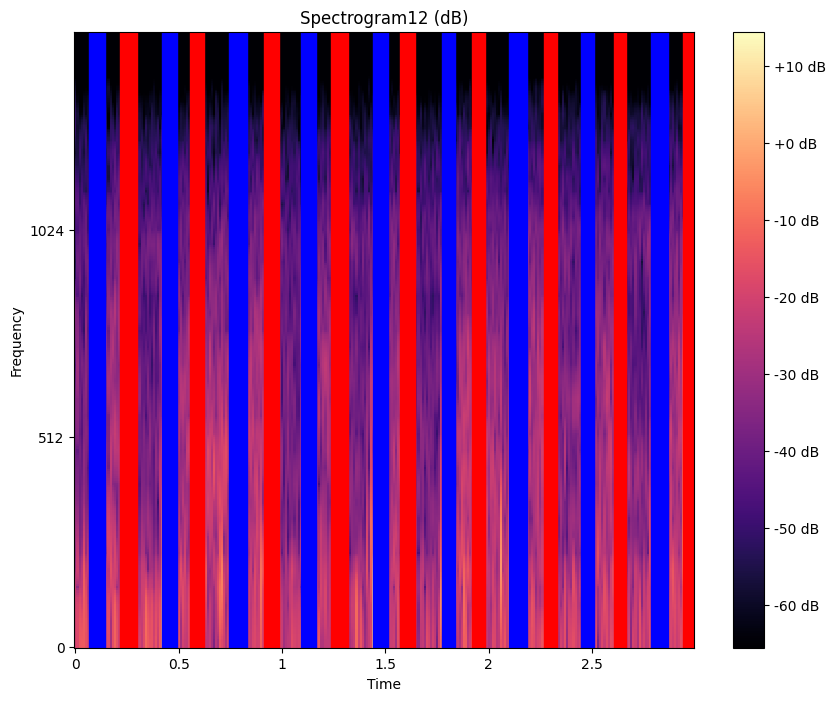

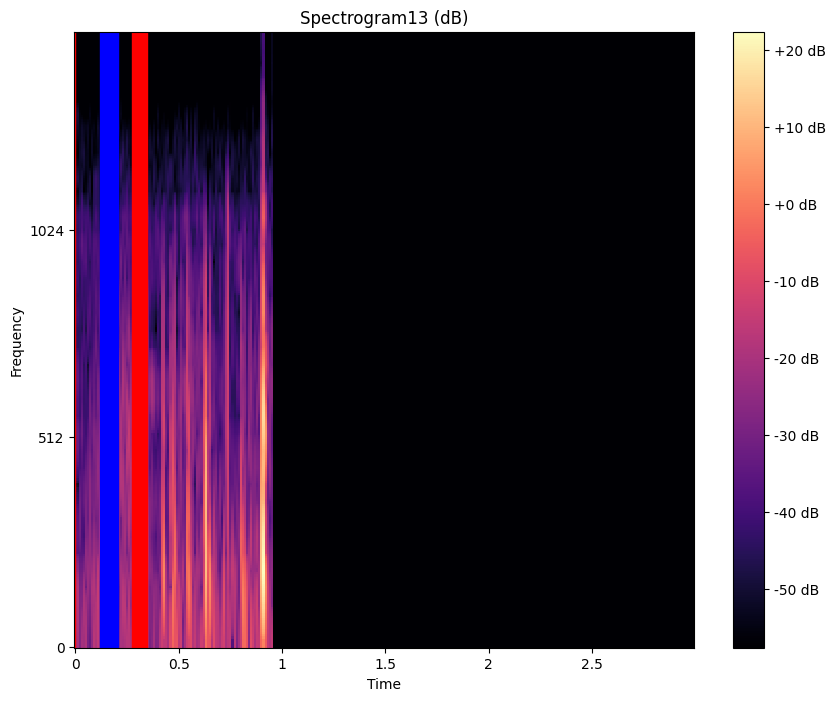

12번 스펙트로그램의 마지막이 S2로 끝나고 13번 스펙트로그램의 시작이 아주 짧지만 S2로 이어서 시작되는 것을 확인할 수 있습니다.

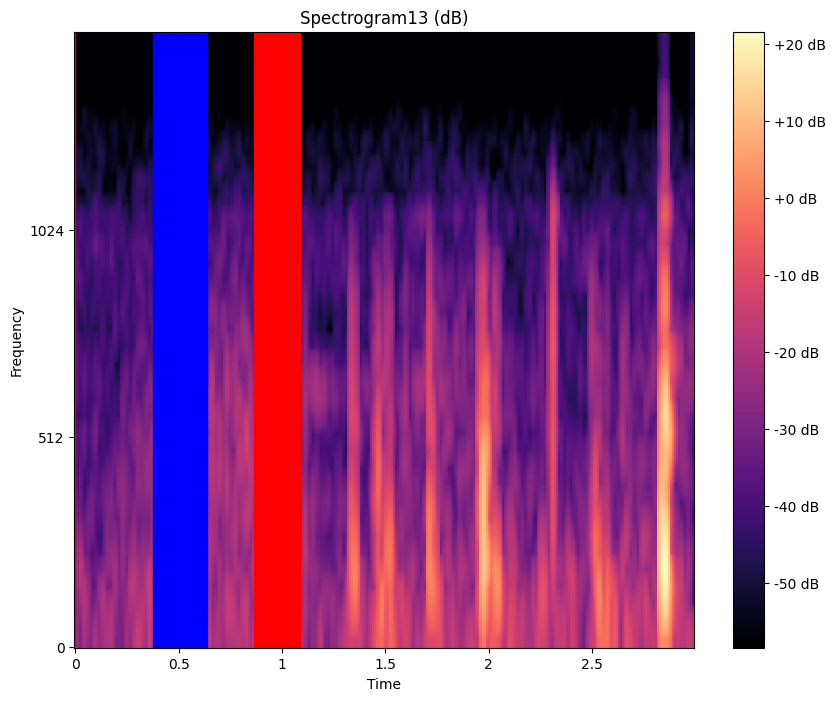

resizing=True로 했을 때의 결과입니다. 13번의 라벨 데이터가 resizing scale에 맞게 가로로 늘어난 것을 확인할 수 있습니다.